# 1 Data Exploration

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Set style for visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

1.1 Load the dataset

In [5]:
# Load the dataset (adjust path as needed)
df = pd.read_csv('../data/application_data.csv')  # Replace with your actual filename
print("Dataset shape:", df.shape)

Dataset shape: (307511, 122)


1.2 Basic Exploration

In [6]:
# Display first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Display column data types
print("\nData types:")
print(df.dtypes)

# Summary statistics for numerical features
print("\nSummary statistics:")
print(df.describe())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


First 5 rows:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                

1.3 Check for Missing Values


Missing values per column:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


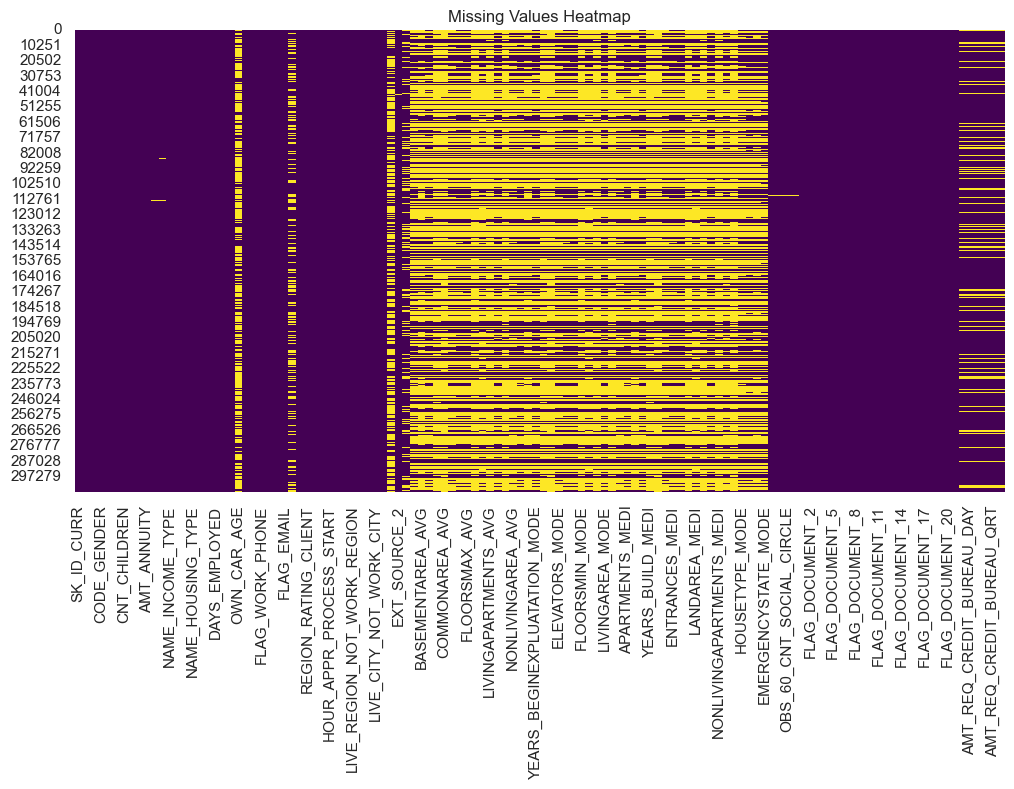

In [7]:
# Check missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

1.4 Visualize Target Variable Distribution


Target variable distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


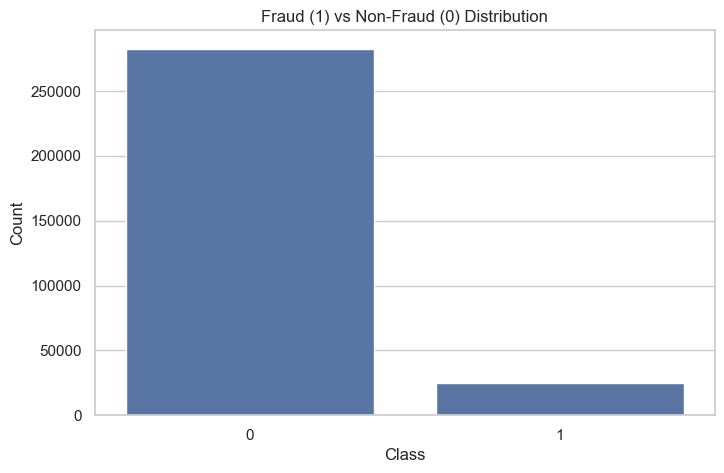


Fraud cases: 8.07% of total dataset


In [8]:
# Check class distribution
target_counts = df['TARGET'].value_counts()
print("\nTarget variable distribution:")
print(target_counts)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=df)
plt.title("Fraud (1) vs Non-Fraud (0) Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Calculate percentage
fraud_percentage = (target_counts[1] / (target_counts[0] + target_counts[1])) * 100
print(f"\nFraud cases: {fraud_percentage:.2f}% of total dataset")

## 2. Data Preprocessing

2.1 Handle Missing Values

In [9]:
# Fill numerical missing values with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())  # Should be 0


Missing values after imputation:
0


2.2 Encode Categorical Variables

In [10]:
# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Verify encoding
print("\nSample encoded categorical data:")
print(df[categorical_cols].head())


Sample encoded categorical data:
   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                1   
1                   0            0             0                0   
2                   1            1             1                1   
3                   0            0             0                1   
4                   0            1             0                1   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_STAR

2.3 Feature Scaling

In [11]:
# Scale numerical features (excluding target)
scaler = StandardScaler()
features_to_scale = [col for col in numerical_cols if col != 'TARGET']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verify scaling
print("\nSample scaled numerical data:")
print(df[features_to_scale].head())


Sample scaled numerical data:
   SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0   -1.733423     -0.577538          0.142129   -0.478095    -0.166143   
1   -1.733413     -0.577538          0.426792    1.725450     0.592683   
2   -1.733403     -0.577538         -0.427196   -1.152888    -1.404669   
3   -1.733384     -0.577538         -0.142533   -0.711430     0.177874   
4   -1.733374     -0.577538         -0.199466   -0.213734    -0.361749   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        -0.507236                   -0.149452    1.506880      -0.456215   
1         1.600873                   -1.252750   -0.166821      -0.460115   
2        -1.092145                   -0.783451   -0.689509      -0.453299   
3        -0.653463                   -0.928991   -0.680114      -0.473217   
4        -0.068554                    0.563570   -0.892535      -0.473210   

   DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19

2.4 Train-Test Split

In [12]:
# Separate features and target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split data (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Verify shapes
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts(normalize=True))


Training set shape: (246008, 121)
Test set shape: (61503, 121)
Class distribution in training set:
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


# 3. Model Training & Evaluation

3.1 Baseline Model (Random Forest)

In [13]:
# Initialize and train model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Handles class imbalance
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

3.2 Evaluate Model Performance

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.61      0.00      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.76      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



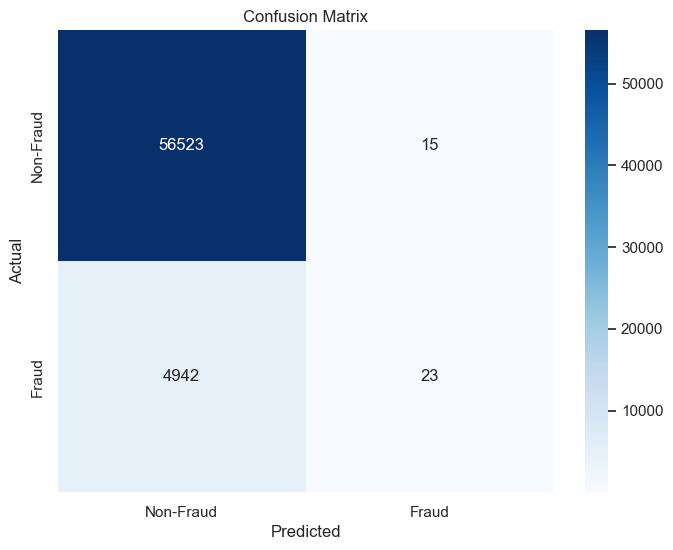


ROC AUC Score: 0.7238909997774581


In [14]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

3.3 Feature Importance Analysis

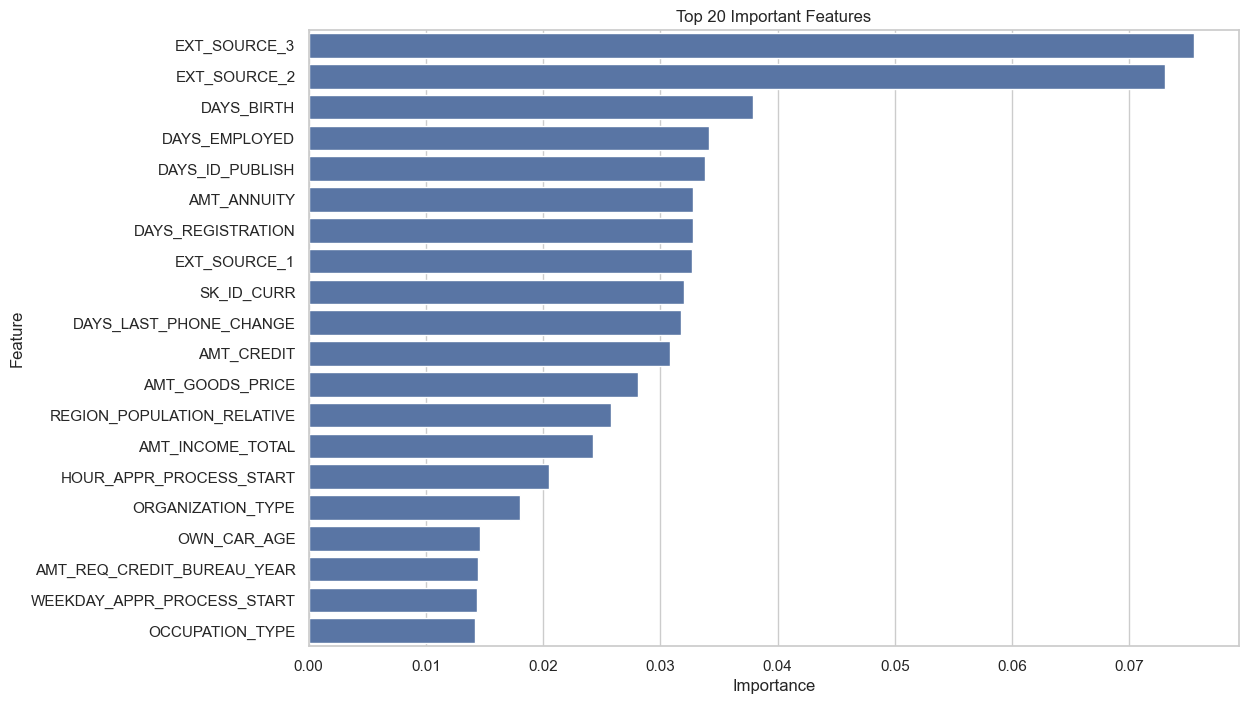

In [16]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title("Top 20 Important Features")
plt.show()

# 4. Handling Class Imbalance (Optional)

In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Retrain model
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_smote = rf_model_smote.predict(X_test)
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))


Class distribution after SMOTE:
TARGET
0    226148
1    226148
Name: count, dtype: int64

Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56538
           1       0.23      0.03      0.05      4965

    accuracy                           0.91     61503
   macro avg       0.58      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503

